## Exercicio_03

In [9]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [10]:
import pandas as pd


uri = "https://raw.githubusercontent.com/alanammorais/ml_Uniesp/master/datasets/Aula%2003/adult.data2"
dados = pd.read_csv(uri)

In [11]:
dados.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Makes50K'],
      dtype='object')

In [61]:
X = dados [['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
            'hours-per-week']]

X = dados.drop(columns=['workclass', 'Makes50K', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country'], axis=1)
X.sample(10)         

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
12479,56,466498,11,0,0,60
14074,40,73025,9,0,0,30
19200,25,190650,13,0,0,40
7958,50,133963,13,0,0,40
13219,62,136684,9,0,0,30
9840,24,259865,9,0,0,30
21239,44,291568,9,0,0,40
26181,46,501671,6,0,0,40
16593,61,215591,9,0,1887,40
21663,61,95500,9,0,0,40


In [62]:
y = dados['Makes50K']
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: Makes50K, dtype: object

In [63]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=4)

In [64]:
results = pd.DataFrame()

## Algoritimos

In [72]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#### AdaBoost

In [66]:
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [67]:
y_pred = adb.predict(x_test)
accuracy_score(y_test, y_pred)

0.8331456648582249

In [68]:
resp = cross_val_score(adb, x_train , y_train, scoring='accuracy')
results['Ada'] = resp

-------

#### Random Forest

In [69]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [70]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8032551950046064

In [71]:
resp = cross_val_score(rf, x_train , y_train, scoring='accuracy')
results['RandomForest'] = resp

-------

#### Gradiente Boosting

In [76]:
from pandas.core.common import random_state
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
      max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_train, y_train)

0.8406897156897157

In [78]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8347834988228069

In [80]:
resp = cross_val_score(rf, x_train , y_train, scoring='accuracy')
results['GradientBoosting'] = resp

-----

## Ensemble - Voting

In [81]:
clf_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
rf_model = RandomForestClassifier(n_estimators=20)
adb_model = AdaBoostClassifier(n_estimators = 5, learning_rate = 1)

In [82]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
  estimators=[
    ('clf_model', clf_model), 
    ('rf_model', rf_model),
    ('adb_model', adb_model)             
  ], voting = 'hard')

In [83]:
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('clf_model',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=1,
                                                         random_state=0)),
                             ('rf_model',
                              RandomForestClassifier(n_estimators=20)),
                             ('adb_model',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=5))])

In [84]:
y_pred = vc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8307912785341386

## Visualização

[Text(0, 0, 'Ada'), Text(0, 0, 'RandomForest'), Text(0, 0, 'GradientBoosting')]

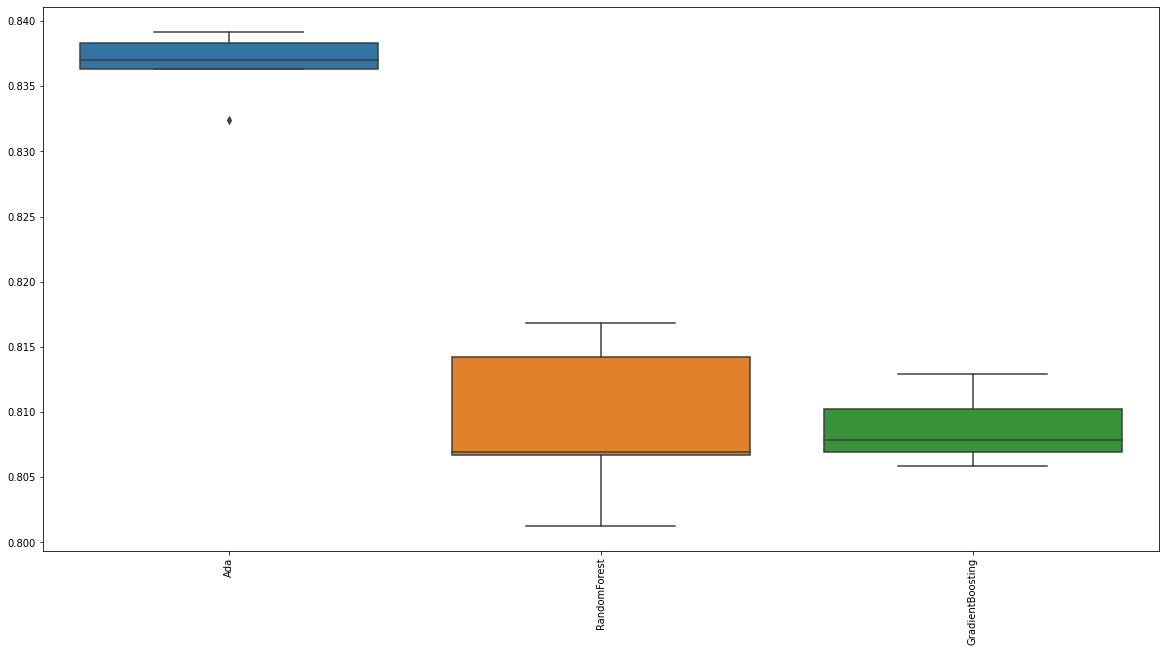

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

labels= results.columns
plt.figure(figsize=(20, 10))

sns.boxplot(data = results).set_xticklabels(labels, rotation=90)